# The analysis for the presentation for the 05/03/2024

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
from pathlib import Path


In [4]:
Path.cwd() 

PosixPath('/home/apoirotb/dev/Inria/survivalGPU/simulations/python/data_analysis')

In [5]:
def path_translator(experiement_name):

    result_folder = Path("../Simulation_results/")
    file_name = "analyzed_" + experiement_name + ".csv"
    results_path = result_folder / experiement_name / file_name

    return results_path

In [7]:
experiment_name = "HR : 1.5, 2, 2.8 : 100 - 10000"
file_path = path_translator(experiment_name)
data = pd.read_csv(file_path)
data

# experiment_name = "HR : 2, patients : 100 - 100 000"
# file_path = path_translator(experiment_name)
# print(file_path)
# data2 = pd.read_csv(file_path)
# data = pd.concat([data1,data2])
# data


FileNotFoundError: [Errno 2] No such file or directory: '../Simulation_results/HR : 1.5, 2, 2.8 : 100 - 10000/analyzed_HR : 1.5, 2, 2.8 : 100 - 10000.csv'

In [13]:
def plot_HR(ax,data,HR_target):
    sub_data = data[data["HR_target"]==HR_target]
    sub_data = sub_data[sub_data["n_patients"] > 100]
    n_patients = list(sub_data["n_patients"].unique())
    means = sub_data["HR_calculated_GPU_bootstraps"]
    lowers = list(sub_data["HR_calculated_GPU_bootstraps_2_5"])
    highers = list(sub_data["HR_calculated_GPU_bootstraps_97_5"])

    print(n_patients)

    minlower = min(lowers)
    maxhigher = max(highers)

    errors =  [means - lowers, highers - means]
    ax.errorbar(n_patients, means, yerr=errors, fmt='o', capsize=5, color ="black",label = "Calculated result")

    return ax, minlower, maxhigher



In [33]:
def plot_HR_simple(data,HR_target):
    sub_data = data[data["HR_target"]==HR_target]
    sub_data = sub_data[sub_data["n_patients"] > 100]
    n_patients = list(sub_data["n_patients"].unique())
    means = sub_data["HR_calculated_GPU_bootstraps"]
    lowers = list(sub_data["HR_calculated_GPU_bootstraps_2_5"])
    highers = list(sub_data["HR_calculated_GPU_bootstraps_97_5"])

    errors =  [means - lowers, highers - means]


    plt.errorbar(n_patients, means, yerr=errors, fmt='o', capsize=5, color ="black",label = "Calculated result")

    plt.axhline(y=HR_target, color='grey', linestyle='dashed', label = 'HR target')
    plt.ylabel("HR")
    plt.xlabel("Number of patients")
    plt.legend()
    plt.xscale('log')



ValueError: 'x' and 'y' must have the same size

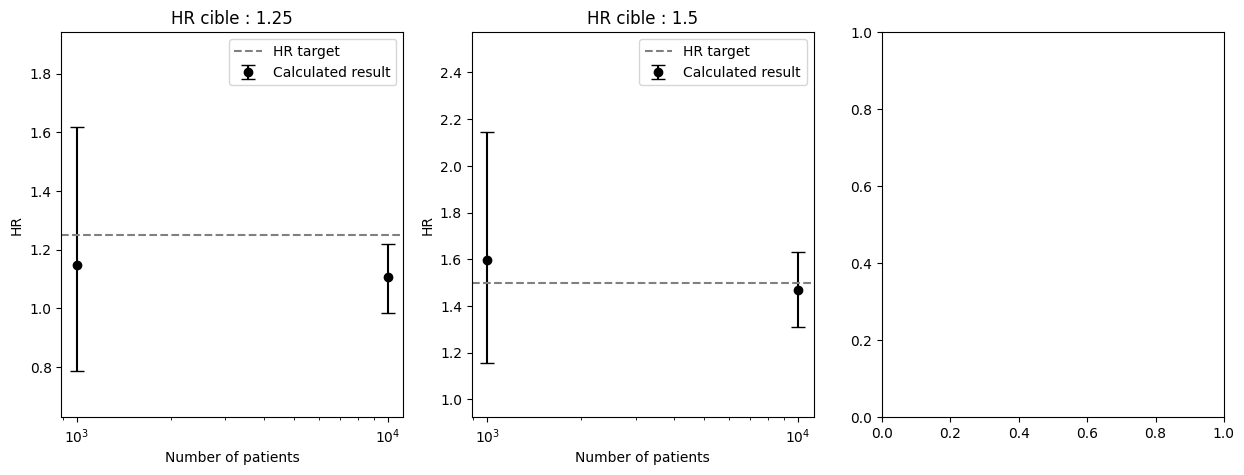

In [14]:

plt.figure(figsize=(15, 11))


HR_target = 1.25
ax = plt.subplot(2,3, 1) 
ax, min_lower, max_higher = plot_HR(ax,data,HR_target)


plt.axhline(y=HR_target, color='grey', linestyle='dashed', label = 'HR target')
plt.ylim(min(1,min_lower * 0.8),max_higher * 1.2)
plt.ylabel("HR")
plt.xlabel("Number of patients")
plt.legend()
plt.xscale('log')
plt.title("HR cible : 1.25")


##############
HR_target = 1.5
ax = plt.subplot(2, 3, 2) 
ax, min_lower, max_higher = plot_HR(ax,data,HR_target)


plt.axhline(y=HR_target, color='grey', linestyle='dashed', label = 'HR target')
plt.ylim(min(1,min_lower * 0.8),max_higher * 1.2)



plt.ylabel("HR")
plt.xlabel("Number of patients")
plt.legend()
plt.xscale('log')
plt.title("HR cible : 1.5")


###########
HR_target = 2
ax = plt.subplot(2, 3, 3) 
ax, min_lower, max_higher = plot_HR(ax,data,HR_target)



plt.axhline(y=HR_target, color='grey', linestyle='dashed', label = 'HR target')
plt.ylim(min(1,min_lower * 0.8),max_higher * 1.2)

plt.ylabel("HR")
plt.xlabel("Number of patients")
plt.legend()
plt.xscale('log')
plt.title("HR cible : 2")


##############""
HR_target = 2.8
ax = plt.subplot(2, 3, 4) 
ax, min_lower, max_higher = plot_HR(ax,data,HR_target)




plt.axhline(y=HR_target, color='grey', linestyle='dashed', label = 'HR target')
plt.ylim(min(1,min_lower * 0.8),max_higher * 1.2)

plt.ylabel("HR")
plt.xlabel("Number of patients")
plt.legend()
plt.xscale('log')
plt.title("HR cible : 2.8")




##########
HR_target = 3.5
ax = plt.subplot(2, 3, 5) 
ax, min_lower, max_higher = plot_HR(ax,data,HR_target)


plt.axhline(y=HR_target, color='grey', linestyle='dashed', label = 'HR target')
plt.ylim(min(1,min_lower * 0.8),max_higher * 1.2)

plt.ylabel("HR")
plt.xlabel("Number of patients")
plt.legend()
plt.xscale('log')
plt.title("HR cible : 3.5")


    # result_folder = Path("../Simulation_results/")
    # file_name = "analyzed_" + experiement_name + ".csv"
    # results_path = result_folder / experiement_name / file_name

slide_path = Path("../../../Notes/Slides/")
prez_name = "Meeting 05-03-2023/"



image_name = "HR results.png"

image_path = slide_path / prez_name / "images" / image_name

plt.savefig(image_path)












In [2]:
plt.legend()
plt.xscale('log')
plt.title("HR cible : 1.25")

hr_targets = [1.5, 2, 2.8, 3.5]
subplot_positions = [2, 3, 4, 5]

for i, hr_target in enumerate(hr_targets):
    ax = plt.subplot(2, 3, subplot_positions[i])
    ax, min_lower, max_higher = plot_HR(ax, data, hr_target)

    plt.axhline(y=hr_target, color='grey', linestyle='dashed', label='HR target')
    plt.ylim(min(1, min_lower * 0.8), max_higher * 1.2)

    plt.ylabel("HR")
    plt.xlabel("Number of patients")
    plt.legend()
    plt.xscale('log')
    plt.title("HR cible : " + str(hr_target))

slide_path = Path("../../../Notes/Slides/")
prez_name = "Meeting 05-03-2023/"
image_name = "HR results.png"
image_path = slide_path / prez_name / "images" / image_name

plt.savefig(image_path)

NameError: name 'plt' is not defined

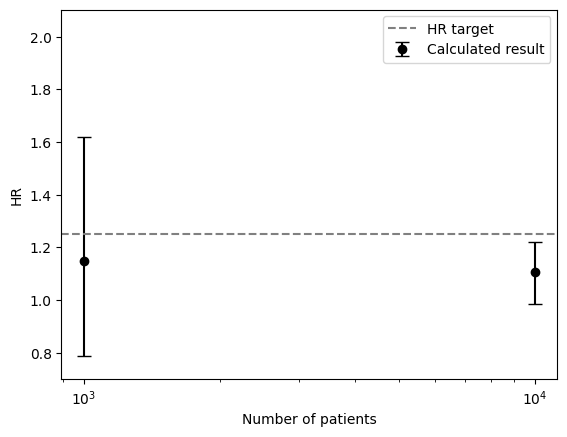

In [19]:
HR_target = 1.25
plot_HR(data,HR_target)

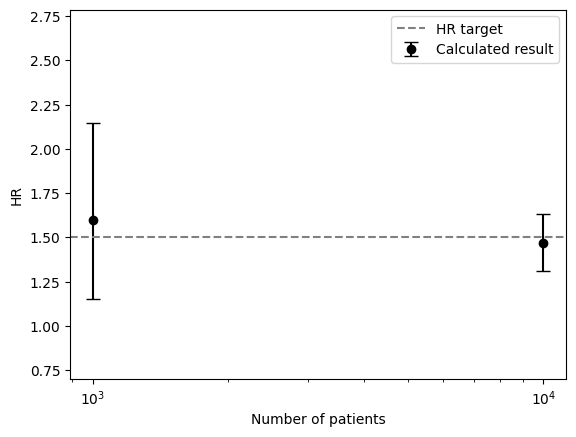

In [20]:
HR_target = 1.5
plot_HR(data,HR_target)

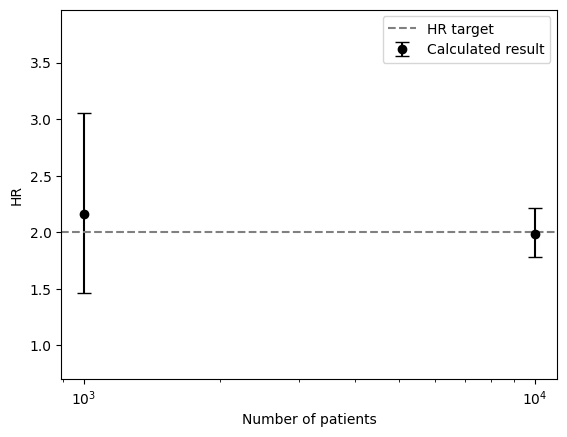

In [21]:
HR_target = 2
plot_HR(data,HR_target)

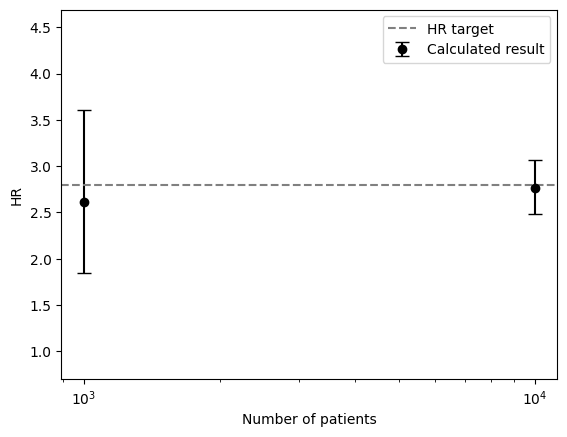

In [22]:
HR_target = 2.8
plot_HR(data,HR_target)

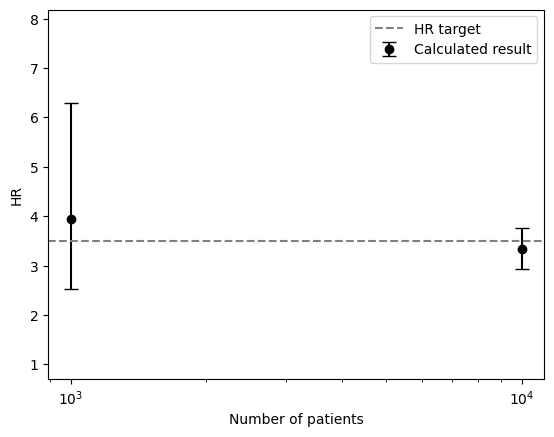

In [23]:
HR_target = 3.5
plot_HR(data,HR_target)